**Exploring the CIFAKE Dataset for Real vs. AI-Generated Image Detection**


The CIFAKE dataset is specifically designed for research and development in computer vision techniques aimed at discerning authenticity in images. This dataset serves as a valuable resource for differentiating between real images and those generated by artificial intelligence.


In [46]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random
import pandas as pd
from torch.utils.data import Dataset
from PIL import Image

In [2]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize images to 32x32 if necessary
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [10]:
!pip install --user kaggle

In [7]:
!mkdir ~/.kaggle
!mv /path/to/downloaded/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions to keep it secure

mv: cannot stat '/path/to/downloaded/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [8]:
!kaggle datasets download -d birdy654/cifake-real-and-ai-generated-synthetic-images

Dataset URL: https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images
License(s): other
 97% 101M/105M [00:00<00:00, 225MB/s] 
100% 105M/105M [00:00<00:00, 210MB/s]


In [9]:
!unzip cifake-real-and-ai-generated-synthetic-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/REAL/4500 (10).jpg  
  inflating: train/REAL/4500 (2).jpg  
  inflating: train/REAL/4500 (3).jpg  
  inflating: train/REAL/4500 (4).jpg  
  inflating: train/REAL/4500 (5).jpg  
  inflating: train/REAL/4500 (6).jpg  
  inflating: train/REAL/4500 (7).jpg  
  inflating: train/REAL/4500 (8).jpg  
  inflating: train/REAL/4500 (9).jpg  
  inflating: train/REAL/4500.jpg     
  inflating: train/REAL/4501 (10).jpg  
  inflating: train/REAL/4501 (2).jpg  
  inflating: train/REAL/4501 (3).jpg  
  inflating: train/REAL/4501 (4).jpg  
  inflating: train/REAL/4501 (5).jpg  
  inflating: train/REAL/4501 (6).jpg  
  inflating: train/REAL/4501 (7).jpg  
  inflating: train/REAL/4501 (8).jpg  
  inflating: train/REAL/4501 (9).jpg  
  inflating: train/REAL/4501.jpg     
  inflating: train/REAL/4502 (10).jpg  
  inflating: train/REAL/4502 (2).jpg  
  inflating: train/REAL/4502 (3).jpg  
  inflating: train/REAL/4502 (4).jpg  
  inflating:

In [13]:
data_dir = '/content/train'  # Update this path/content/train/FAKE

In [22]:
real_dir = os.path.join(data_dir, 'REAL')
fake_dir = os.path.join(data_dir, 'FAKE')


In [23]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize images to 32x32 if necessary
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [24]:
class CustomImageDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        self.images = []

        # Load all image paths
        for filename in os.listdir(directory):
            if filename.endswith(('.png', '.jpg', '.jpeg')):  # Add other extensions if needed
                self.images.append(os.path.join(directory, filename))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image

In [25]:
real_dataset = CustomImageDataset(real_dir, transform=transform)
fake_dataset = CustomImageDataset(fake_dir, transform=transform)

In [26]:
real_loader = DataLoader(real_dataset, batch_size=4, shuffle=True)
fake_loader = DataLoader(fake_dataset, batch_size=4, shuffle=True)

In [28]:
real_images = next(iter(real_loader))
print(real_images.shape)


torch.Size([4, 3, 32, 32])


Dispay few datasets

In [34]:
def denormalize(tensor):
    """Denormalizes a tensor image to original pixel values."""
    tensor = tensor.clone()  # Don't modify the original tensor
    tensor = tensor * 0.5 + 0.5  # Denormalize: Scale back to [0, 1]
    tensor = tensor.clamp(0, 1)  # Ensure values are in the valid range
    return tensor

# Update the show_samples function
def show_samples(dataset, num_samples=5):
    indices = random.sample(range(len(dataset)), num_samples)

    plt.figure(figsize=(10, 5))

    for i, idx in enumerate(indices):
        data = dataset[idx]
        if isinstance(data, tuple):
            img, _ = data
        else:
            img = data

        img = denormalize(img)  # Denormalize before displaying

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img.permute(1, 2, 0))  # Rearrange dimensions for display
        plt.axis('off')
    plt.show()


Real Images:


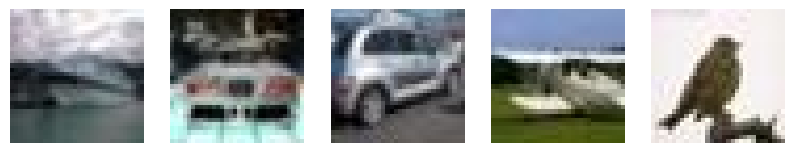

Fake Images:


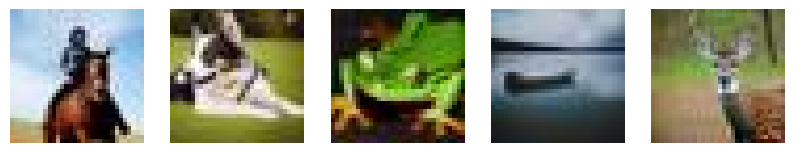

In [36]:
# Display samples from the real dataset
print("Real Images:")
show_samples(real_dataset, num_samples=5)

# Display samples from the fake dataset
print("Fake Images:")
show_samples(fake_dataset, num_samples=5)


Lets print the dimensions of images as they are blur

In [43]:
def get_image_dimensions(folder_path):
    image_data = []  # List to store image names and dimensions
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
            img = Image.open(os.path.join(folder_path, filename))
            image_data.append({'filename': filename, 'width': img.size[0], 'height': img.size[1]})
    return image_data

In [47]:
real_image_dimensions = get_image_dimensions('/content/train/REAL')

# Create a DataFrame from the list
real_images_df = pd.DataFrame(real_image_dimensions)

In [49]:
real_images_df.head()

,filename,width,height
0,1101 (8).jpg,32,32
1,1545 (5).jpg,32,32
2,0585 (7).jpg,32,32
3,2781 (6).jpg,32,32
4,0161 (7).jpg,32,32


In [50]:
real_images_df.describe()

,width,height
count,50000.0,50000.0
mean,32.0,32.0
std,0.0,0.0
min,32.0,32.0
25%,32.0,32.0
50%,32.0,32.0
75%,32.0,32.0
max,32.0,32.0


In [52]:
fake_image_dimensions = get_image_dimensions('/content/train/FAKE')

# Create a DataFrame from the list
fake_images_df = pd.DataFrame(fake_image_dimensions)

In [53]:
fake_images_df.describe()

,width,height
count,50000.0,50000.0
mean,32.0,32.0
std,0.0,0.0
min,32.0,32.0
25%,32.0,32.0
50%,32.0,32.0
75%,32.0,32.0
max,32.0,32.0


Since the dimensions of the both the fake images and real images is same we can use this data set for our project but the question which pops up now is what if there is some other input which if of high resolution, our model might fail.